In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Initial Dataset 

In [2]:
# Define products
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
product_cost = {'Product A': 10, 'Product B': 20, 'Product C': 15, 'Product D': 30, 'Product E': 25}
holding_cost_rate = 0.1  # 10% of product cost
ordering_cost = 50  # Fixed cost per order

# Define date range
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 1)
date_range = pd.date_range(start_date, end_date)

# Initialize the dataframe
data = {
    'Date': [],
    'Product': [],
    'Starting Inventory': [],
    'Demand': [],
    'Order Quantity': [],
    'Sold Quantity': [],
    'Ending Inventory': [],
    'Holding Cost': [],
    'Ordering Cost': [],
    'Sales': [],
    'Stock Out': []
}

# Simulate data
initial_inventory = {product: random.randint(50, 150) for product in products}  # Initial inventory
inventory = initial_inventory.copy()

for date in date_range:
    for product in products:
        starting_inventory = inventory[product]
        # Trend: Increasing demand over time
        trend = 0.01 * (date - start_date).days
        # Seasonality: Monthly pattern
        seasonality = np.sin(2 * np.pi * (date.month - 1) / 12) + 1
        base_demand = 50
        demand = max(0, int(np.random.normal(loc=base_demand + trend * base_demand, scale=10) * seasonality))
        sales = min(starting_inventory, demand)
        stock_out = 1 if sales < demand else 0
        ending_inventory = starting_inventory - sales

        if ending_inventory < demand / 2:  # Reorder condition
            order_qty = random.randint(50, 150)
            ending_inventory += order_qty
            ordering_cost_val = ordering_cost
        else:
            order_qty = 0
            ordering_cost_val = 0

        holding_cost_val = ending_inventory * holding_cost_rate * product_cost[product]

        data['Date'].append(date)
        data['Product'].append(product)
        data['Starting Inventory'].append(starting_inventory)
        data['Demand'].append(demand)
        data['Order Quantity'].append(order_qty)
        data['Sold Quantity'].append(sales)
        data['Ending Inventory'].append(ending_inventory)
        data['Holding Cost'].append(holding_cost_val)
        data['Ordering Cost'].append(ordering_cost_val)
        data['Sales'].append(sales * product_cost[product])
        data['Stock Out'].append(stock_out)

        inventory[product] = ending_inventory

# Create dataframe
df = pd.DataFrame(data)

print(df.head())
 #we have this dataset how to apply optimization technique in them

        Date    Product  Starting Inventory  Demand  Order Quantity  \
0 2023-01-01  Product A                  71      33               0   
1 2023-01-01  Product B                 145      49               0   
2 2023-01-01  Product C                 119      53               0   
3 2023-01-01  Product D                  94      39               0   
4 2023-01-01  Product E                 124      54               0   

   Sold Quantity  Ending Inventory  Holding Cost  Ordering Cost  Sales  \
0             33                38          38.0              0    330   
1             49                96         192.0              0    980   
2             53                66          99.0              0    795   
3             39                55         165.0              0   1170   
4             54                70         175.0              0   1350   

   Stock Out  
0          0  
1          0  
2          0  
3          0  
4          0  


In [3]:
df = pd.read_csv("daily_inventory_management_data_with_scenarios.csv")


In [4]:
df

,Date,Product,Starting Inventory,Demand,Order Quantity,Sold Quantity,Ending Inventory,Holding Cost,Ordering Cost,Sales,Stock Out
0,2023-01-01,Product A,70,52,76,52,94,94.0,50,520,0
1,2023-01-01,Product B,147,50,0,50,97,194.0,0,1000,0
2,2023-01-01,Product C,94,37,0,37,57,85.5,0,555,0
3,2023-01-01,Product D,90,59,0,59,31,93.0,0,1770,0
4,2023-01-01,Product E,67,41,0,41,26,65.0,0,1025,0
...,...,...,...,...,...,...,...,...,...,...,...
1825,2024-01-01,Product A,115,236,56,115,56,56.0,50,1150,1
1826,2024-01-01,Product B,112,225,78,112,78,156.0,50,2240,1
1827,2024-01-01,Product C,68,223,63,68,63,94.5,50,1020,1
1828,2024-01-01,Product D,68,237,97,68,97,291.0,50,2040,1


In [5]:
df.head(30)

,Date,Product,Starting Inventory,Demand,Order Quantity,Sold Quantity,Ending Inventory,Holding Cost,Ordering Cost,Sales,Stock Out
0,2023-01-01,Product A,70,52,76,52,94,94.0,50,520,0
1,2023-01-01,Product B,147,50,0,50,97,194.0,0,1000,0
2,2023-01-01,Product C,94,37,0,37,57,85.5,0,555,0
3,2023-01-01,Product D,90,59,0,59,31,93.0,0,1770,0
4,2023-01-01,Product E,67,41,0,41,26,65.0,0,1025,0
5,2023-01-02,Product A,94,66,119,66,147,147.0,50,660,0
6,2023-01-02,Product B,97,57,0,57,40,80.0,0,1140,0
7,2023-01-02,Product C,57,43,126,43,140,210.0,50,645,0
8,2023-01-02,Product D,31,52,95,31,95,285.0,50,930,1
9,2023-01-02,Product E,26,36,91,26,91,227.5,50,650,1


## EOQ (Economic Order Quantity)

In [6]:
df["Demand"].mean()

111.74535519125683

In [72]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [73]:
df

,Date,Product,Starting Inventory,Demand,Order Quantity,Sold Quantity,Ending Inventory,Holding Cost,Ordering Cost,Sales,Stock Out
0,2023-01-01,Product A,70,52,76,52,94,94.0,50,520,0
1,2023-01-01,Product B,147,50,0,50,97,194.0,0,1000,0
2,2023-01-01,Product C,94,37,0,37,57,85.5,0,555,0
3,2023-01-01,Product D,90,59,0,59,31,93.0,0,1770,0
4,2023-01-01,Product E,67,41,0,41,26,65.0,0,1025,0
...,...,...,...,...,...,...,...,...,...,...,...
1825,2024-01-01,Product A,115,236,56,115,56,56.0,50,1150,1
1826,2024-01-01,Product B,112,225,78,112,78,156.0,50,2240,1
1827,2024-01-01,Product C,68,223,63,68,63,94.5,50,1020,1
1828,2024-01-01,Product D,68,237,97,68,97,291.0,50,2040,1


In [74]:
df['Month'] = df['Date'].dt.month

In [75]:
df

,Date,Product,Starting Inventory,Demand,Order Quantity,Sold Quantity,Ending Inventory,Holding Cost,Ordering Cost,Sales,Stock Out,Month
0,2023-01-01,Product A,70,52,76,52,94,94.0,50,520,0,1
1,2023-01-01,Product B,147,50,0,50,97,194.0,0,1000,0,1
2,2023-01-01,Product C,94,37,0,37,57,85.5,0,555,0,1
3,2023-01-01,Product D,90,59,0,59,31,93.0,0,1770,0,1
4,2023-01-01,Product E,67,41,0,41,26,65.0,0,1025,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1825,2024-01-01,Product A,115,236,56,115,56,56.0,50,1150,1,1
1826,2024-01-01,Product B,112,225,78,112,78,156.0,50,2240,1,1
1827,2024-01-01,Product C,68,223,63,68,63,94.5,50,1020,1,1
1828,2024-01-01,Product D,68,237,97,68,97,291.0,50,2040,1,1


### Holding Cost

In [11]:
Cost_A = (df[df["Product"]=="Product A"]["Sales"]/df[df["Product"]=="Product A"]["Sold Quantity"]).mean()
Cost_A

10.0

In [12]:
Holding_cost_A = Cost_A*0.1
Holding_cost_A

1.0

In [13]:
Cost_B = (df[df["Product"]=="Product B"]["Sales"]/df[df["Product"]=="Product B"]["Sold Quantity"]).mean()
Cost_B

20.0

In [14]:
Holding_cost_B = Cost_B*0.1
Holding_cost_B

2.0

In [15]:
Cost_C = (df[df["Product"]=="Product C"]["Sales"]/df[df["Product"]=="Product C"]["Sold Quantity"]).mean()
Cost_C

15.0

In [16]:
Holding_cost_C = Cost_C*0.1
Holding_cost_C

1.5

In [17]:
Cost_D = (df[df["Product"]=="Product D"]["Sales"]/df[df["Product"]=="Product D"]["Sold Quantity"]).mean()
Cost_D

30.0

In [18]:
Holding_cost_D = Cost_D*0.1
Holding_cost_D

3.0

In [19]:
Cost_E = (df[df["Product"]=="Product E"]["Sales"]/df[df["Product"]=="Product E"]["Sold Quantity"]).mean()
Cost_E

25.0

In [20]:
Holding_cost_E = Cost_E*0.1
Holding_cost_E

2.5

In [21]:
annual_ordering_cost = df.groupby('Product')['Ordering Cost'].sum()
annual_ordering_cost.columns = ['Product', 'Annual Ordering Cost']

print(annual_ordering_cost)

Product
Product A    13150
Product B    12850
Product C    13050
Product D    13150
Product E    13150
Name: Ordering Cost, dtype: int64


## MONTHLY

In [22]:
df["Month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [23]:
monthly_demand = df.groupby([ 'Month', 'Product'])['Demand'].sum().reset_index()


In [24]:
monthly_demand

,Month,Product,Demand
0,1,Product A,2034
1,1,Product B,2123
2,1,Product C,1913
3,1,Product D,2033
4,1,Product E,1970
5,2,Product A,3106
6,2,Product B,2953
7,2,Product C,2957
8,2,Product D,3035
9,2,Product E,2899


In [25]:
monthly_Ordering_Cost = (df.groupby([ 'Month', 'Product'])['Ordering Cost'].sum()/df.groupby([ 'Month', 'Product'])['Order Quantity'].count()).reset_index()
monthly_Ordering_Cost

,Month,Product,0
0,1,Product A,26.562500
1,1,Product B,26.562500
2,1,Product C,26.562500
3,1,Product D,29.687500
4,1,Product E,28.125000
5,2,Product A,44.642857
6,2,Product B,44.642857
7,2,Product C,44.642857
8,2,Product D,42.857143
9,2,Product E,42.857143


In [26]:
monthly_Holding_cost = (df.groupby([ 'Month', 'Product'])['Holding Cost'].sum()/df.groupby([ 'Month', 'Product'])['Ending Inventory'].sum()).reset_index()
monthly_Holding_cost

,Month,Product,0
0,1,Product A,1.0
1,1,Product B,2.0
2,1,Product C,1.5
3,1,Product D,3.0
4,1,Product E,2.5
5,2,Product A,1.0
6,2,Product B,2.0
7,2,Product C,1.5
8,2,Product D,3.0
9,2,Product E,2.5


In [76]:
monthly_Order_Quantity = (df.groupby(['Month','Product'])['Order Quantity'].sum()).reset_index()
monthly_Order_Quantity

,Month,Product,Order Quantity
0,1,Product A,1790
1,1,Product B,1853
2,1,Product C,1669
3,1,Product D,1788
4,1,Product E,1743
5,2,Product A,2539
6,2,Product B,2489
7,2,Product C,2507
8,2,Product D,2524
9,2,Product E,2499


In [78]:
# Merge monthly data into a single DataFrame
monthly_data = pd.merge(monthly_demand, monthly_Ordering_Cost, on=['Month', 'Product'])
monthly_data = pd.merge(monthly_data, monthly_Holding_cost, on=['Month', 'Product'])
monthly_data = pd.merge(monthly_data,monthly_Order_Quantity,on=['Month',"Product"])

print(monthly_data)

# Calculate monthly EOQ
monthly_data['EOQ'] = np.sqrt((2 * monthly_data['Demand'] * monthly_data["0_x"]) / monthly_data['0_y'])

# Rename columns for clarity
monthly_data.columns = ['Month', 'Product', 'Monthly Demand', 'monthly_Ordering_Cost', 'Monthly Holding Cost','Monthly Order Quantity', 'Monthly EOQ']

print(monthly_data)


    Month    Product  Demand        0_x  0_y  Order Quantity
0       1  Product A    2034  26.562500  1.0            1790
1       1  Product B    2123  26.562500  2.0            1853
2       1  Product C    1913  26.562500  1.5            1669
3       1  Product D    2033  29.687500  3.0            1788
4       1  Product E    1970  28.125000  2.5            1743
5       2  Product A    3106  44.642857  1.0            2539
6       2  Product B    2953  44.642857  2.0            2489
7       2  Product C    2957  44.642857  1.5            2507
8       2  Product D    3035  42.857143  3.0            2524
9       2  Product E    2899  42.857143  2.5            2499
10      3  Product A    4909  50.000000  1.0            3214
11      3  Product B    5164  50.000000  2.0            3148
12      3  Product C    5123  50.000000  1.5            2930
13      3  Product D    4982  50.000000  3.0            3057
14      3  Product E    5017  50.000000  2.5            2799
15      4  Product A    

In [82]:
monthly_data

,Month,Product,Monthly Demand,monthly_Ordering_Cost,Monthly Holding Cost,Monthly Order Quantity,Monthly EOQ
0,1,Product A,2034,26.562500,1.0,1790,328.719105
1,1,Product B,2123,26.562500,2.0,1853,237.470393
2,1,Product C,1913,26.562500,1.5,1669,260.292304
3,1,Product D,2033,29.687500,3.0,1788,200.590275
4,1,Product E,1970,28.125000,2.5,1743,210.535033
5,2,Product A,3106,44.642857,1.0,2539,526.613168
6,2,Product B,2953,44.642857,2.0,2489,363.084504
7,2,Product C,2957,44.642857,1.5,2507,419.537727
8,2,Product D,3035,42.857143,3.0,2524,294.472895
9,2,Product E,2899,42.857143,2.5,2499,315.268593


In [81]:
monthly_data["Monthly EOQ"].mean()

365.48157503070155

In [47]:
monthly_data["Monthly EOQ"].median()

388.7166031796129

#### EOQ Mean = 365

## Reordering point

In [48]:
monthly_data["Monthly Demand"].mean()

3408.233333333333

In [49]:
monthly_data["Monthly Demand"].median()

3275.0

In [57]:
# Product A
Reordeing_point_A = monthly_data["Monthly Demand"].mean()*5
Reordeing_point_A

17041.166666666664

In [83]:
# Each Product 
Reordeing_point= monthly_data.groupby(['Product'])["Monthly Demand"].mean()*5
Reordeing_point

Product
Product A    17027.500000
Product B    17151.250000
Product C    16996.666667
Product D    17076.666667
Product E    16953.750000
Name: Monthly Demand, dtype: float64

In [87]:
Reordeing_point.mean()

17041.166666666668

### Reording point 17041

## Frequency of order per month

In [85]:
Frequency_of_order= monthly_data.groupby(['Product'])["Monthly Demand"].mean()/monthly_data.groupby(["Product"])["Monthly Order Quantity"].mean()
Frequency_of_order

Product
Product A    1.569777
Product B    1.583680
Product C    1.543690
Product D    1.554485
Product E    1.558130
dtype: float64

In [86]:
Frequency_of_order.mean()

1.561952190983892

### Frequency of ordering 1-2

## Safety Stock per month

In [92]:
# STD of demand per month
demand_std = monthly_data.groupby(['Product'])["Monthly Demand"].std()
demand_std

Product
Product A    2269.932178
Product B    2294.615837
Product C    2281.093093
Product D    2289.441350
Product E    2262.837885
Name: Monthly Demand, dtype: float64

In [93]:
# mean of demand
demand_mean = monthly_data.groupby(['Product'])["Monthly Demand"].mean()
demand_mean

Product
Product A    3405.500000
Product B    3430.250000
Product C    3399.333333
Product D    3415.333333
Product E    3390.750000
Name: Monthly Demand, dtype: float64

In [ ]:
# lead days 5 
# lead time std 1

In [102]:
# Each Product 
#Saftey_stock= monthly_data.groupby(['Product'])[np.sqrt(((5 * demand_std)+(1*demand_mean)))]
#Saftey_stock

In [101]:
import scipy.stats as stats
# Calculate standard deviation of demand during lead time
sigma_LT = np.sqrt(demand_std**2 * 5)

service_level = 0.95    # Desired service level (95%)


# Get the Z-score for the desired service level
z_score = stats.norm.ppf(service_level)

# Calculate safety stock
safety_stock = z_score * sigma_LT

safety_stock

Product
Product A    8348.820816
Product B    8439.607428
Product C    8389.870712
Product D    8420.575642
Product E    8322.727977
Name: Monthly Demand, dtype: float64

In [103]:
safety_stock.mean()

8384.320514845487

In [104]:
safety_stock.median()

8389.870711629013

## YEARLY

In [37]:
# Group by 'Product' and sum the 'Demand' for the entire year
annual_demand = df.groupby('Product')['Demand'].sum().reset_index()

# Rename columns for clarity
annual_demand.columns = ['Product', 'Annual Demand']

print(annual_demand)


     Product  Annual Demand
0  Product A          40866
1  Product B          41163
2  Product C          40792
3  Product D          40984
4  Product E          40689


In [39]:
# Group by 'Product' and sum the 'Ordering Cost' for the entire year
annual_ordering_cost = (df.groupby('Product')['Ordering Cost'].sum()/df.groupby('Product')['Order Quantity'].count()).reset_index()

# Rename columns for clarity
annual_ordering_cost.columns = ['Product', 'Annual Ordering Cost']

print(annual_ordering_cost)


     Product  Annual Ordering Cost
0  Product A             35.928962
1  Product B             35.109290
2  Product C             35.655738
3  Product D             35.928962
4  Product E             35.928962


In [41]:
# Group by 'Product' and sum the 'Holding Cost' for the entire year
annual_holding_cost = (df.groupby('Product')['Holding Cost'].sum()/df.groupby('Product')['Ending Inventory'].sum()).reset_index()

# Rename columns for clarity
annual_holding_cost.columns = ['Product', 'Annual Holding Cost']

print(annual_holding_cost)

     Product  Annual Holding Cost
0  Product A                  1.0
1  Product B                  2.0
2  Product C                  1.5
3  Product D                  3.0
4  Product E                  2.5


In [43]:
#for product A
EOQ_A = np.sqrt((2 * 40866  * 35.92 / 1))
EOQ_A

1713.4215593367558

## Sensitivity analysis

In [44]:
import pandas as pd
import numpy as np

# Given EOQ values and costs
eoq_values = {'Product A': 1718, 'Product B': 1207, 'Product C': 2093, 'Product D':990, 'Product E': 1085}
holding_costs = {'Product A': 1, 'Product B': 2, 'Product C': 1.5, 'Product D': 3, 'Product E': 2.5}
ordering_cost = 35

# Function to calculate EOQ
def calculate_eoq(D, S, H):
    return np.sqrt((2 * D * S) / H)

# Function to calculate total cost
def calculate_total_cost(D, S, H, EOQ):
    total_ordering_cost = (D / EOQ) * S
    total_holding_cost = (EOQ / 2) * H
    return total_ordering_cost + total_holding_cost

# Load the dataset
df = pd.read_csv('daily_inventory_management_data_with_scenarios.csv')

# Calculate annual demand for each product
annual_demand = df.groupby('Product')['Demand'].sum()

# Base case total costs
base_costs = {}
for product in products:
    D = annual_demand[product]
    H = holding_costs[product]
    EOQ = eoq_values[product]
    base_costs[product] = calculate_total_cost(D, ordering_cost, H, EOQ)

# Sensitivity analysis
variations = [-0.2, -0.1, 0, 0.1, 0.2]  # Variations: -20%, -10%, 0%, +10%, +20%
sensitivity_results = []

for product in products:
    D_base = annual_demand[product]
    H_base = holding_costs[product]
    EOQ_base = eoq_values[product]
    base_total_cost = base_costs[product]
    
    for var in variations:
        # Vary demand
        D_var = D_base * (1 + var)
        EOQ_var = calculate_eoq(D_var, ordering_cost, H_base)
        total_cost_var = calculate_total_cost(D_var, ordering_cost, H_base, EOQ_var)
        sensitivity_results.append((product, 'Demand', var, EOQ_var, total_cost_var, base_total_cost))
        
        # Vary ordering cost
        S_var = ordering_cost * (1 + var)
        EOQ_var = calculate_eoq(D_base, S_var, H_base)
        total_cost_var = calculate_total_cost(D_base, S_var, H_base, EOQ_var)
        sensitivity_results.append((product, 'Ordering Cost', var, EOQ_var, total_cost_var, base_total_cost))
        
        # Vary holding cost
        H_var = H_base * (1 + var)
        EOQ_var = calculate_eoq(D_base, ordering_cost, H_var)
        total_cost_var = calculate_total_cost(D_base, ordering_cost, H_var, EOQ_var)
        sensitivity_results.append((product, 'Holding Cost', var, EOQ_var, total_cost_var, base_total_cost))

# Convert results to DataFrame for better readability
sensitivity_df = pd.DataFrame(sensitivity_results, columns=['Product', 'Parameter', 'Variation', 'EOQ', 'Total Cost', 'Base Total Cost'])

# Add a column for the percentage change in total cost
sensitivity_df['Cost Change (%)'] = ((sensitivity_df['Total Cost'] - sensitivity_df['Base Total Cost']) / sensitivity_df['Base Total Cost']) * 100

print(sensitivity_df)

      Product      Parameter  Variation          EOQ   Total Cost  \
0   Product A         Demand       -0.2  1512.777578  1512.777578   
1   Product A  Ordering Cost       -0.2  1512.777578  1512.777578   
2   Product A   Holding Cost       -0.2  1890.971972  1512.777578   
3   Product A         Demand       -0.1  1604.542926  1604.542926   
4   Product A  Ordering Cost       -0.1  1604.542926  1604.542926   
..        ...            ...        ...          ...          ...   
70  Product E  Ordering Cost        0.1  1119.473626  2798.684066   
71  Product E   Holding Cost        0.1  1017.703297  2798.684066   
72  Product E         Demand        0.2  1169.252069  2923.130172   
73  Product E  Ordering Cost        0.2  1169.252069  2923.130172   
74  Product E   Holding Cost        0.2   974.376724  2923.130172   

    Base Total Cost  Cost Change (%)  
0       1691.543655       -10.568221  
1       1691.543655       -10.568221  
2       1691.543655       -10.568221  
3       1691.54

In [45]:
sensitivity_df

,Product,Parameter,Variation,EOQ,Total Cost,Base Total Cost,Cost Change (%)
0,Product A,Demand,-0.2,1512.777578,1512.777578,1691.543655,-10.568221
1,Product A,Ordering Cost,-0.2,1512.777578,1512.777578,1691.543655,-10.568221
2,Product A,Holding Cost,-0.2,1890.971972,1512.777578,1691.543655,-10.568221
3,Product A,Demand,-0.1,1604.542926,1604.542926,1691.543655,-5.143274
4,Product A,Ordering Cost,-0.1,1604.542926,1604.542926,1691.543655,-5.143274
...,...,...,...,...,...,...,...
70,Product E,Ordering Cost,0.1,1119.473626,2798.684066,2668.798387,4.866822
71,Product E,Holding Cost,0.1,1017.703297,2798.684066,2668.798387,4.866822
72,Product E,Demand,0.2,1169.252069,2923.130172,2668.798387,9.529824
73,Product E,Ordering Cost,0.2,1169.252069,2923.130172,2668.798387,9.529824


# Optimized dataset generation

In [141]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define products
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
product_cost = {'Product A': 10, 'Product B': 20, 'Product C': 15, 'Product D': 30, 'Product E': 25}
holding_cost_rate = 0.1  # 10% of product cost
ordering_cost = 50  # Fixed cost per order
EOQ = 365  # Economic Order Quantity
safety_stock = 8384
min_order_qty = 170

# Define date range
start_date = datetime(2024, 1, 1)  # Changed to match starting date
end_date = datetime(2024, 12, 31)
date_range = pd.date_range(start_date, end_date)

# Initialize the dataframe
data = {
    'Date': [],
    'Product': [],
    'Starting Inventory': [],
    'Demand': [],
    'Order Quantity': [],
    'Sold Quantity': [],
    'Ending Inventory': [],
    'Holding Cost': [],
    'Ordering Cost': [],
    'Sales': [],
    'Stock Out': []
}

# Simulate data
initial_inventory = {product: random.randint(min_order_qty + EOQ, min_order_qty + EOQ + 100) for product in products}  # Initial inventory
inventory = initial_inventory.copy()

for date in date_range:
    for product in products:
        starting_inventory = inventory[product]
        # Trend: Increasing demand over time
        trend = 0.01 * (date - start_date).days
        # Seasonality: Monthly pattern
        seasonality = np.sin(2 * np.pi * (date.month - 1) / 12) + 1
        base_demand = 50
        demand = max(0, int(np.random.normal(loc=base_demand + trend * base_demand, scale=10) * seasonality))
        sales = min(starting_inventory, demand)
        stock_out = 1 if sales < demand else 0
        ending_inventory = starting_inventory - sales

        # Reorder condition
        if ending_inventory <= min_order_qty:
            order_qty = EOQ
            ending_inventory += order_qty
            ordering_cost_val = ordering_cost
        else:
            order_qty = 0
            ordering_cost_val = 0

        holding_cost_val = ending_inventory * holding_cost_rate * product_cost[product]

        data['Date'].append(date)
        data['Product'].append(product)
        data['Starting Inventory'].append(starting_inventory)
        data['Demand'].append(demand)
        data['Order Quantity'].append(order_qty)
        data['Sold Quantity'].append(sales)
        data['Ending Inventory'].append(ending_inventory)
        data['Holding Cost'].append(holding_cost_val)
        data['Ordering Cost'].append(ordering_cost_val)
        data['Sales'].append(sales * product_cost[product])
        data['Stock Out'].append(stock_out)

        inventory[product] = ending_inventory

# Create dataframe
df4 = pd.DataFrame(data)

# Save to CSV
df4.to_csv('Optimized_inventory_management_data.csv', index=False)

print(df.head())


        Date    Product  Starting Inventory  Demand  Order Quantity  \
0 2024-01-01  Product A               405.0      36               0   
1 2024-01-01  Product B               456.0      57               0   
2 2024-01-01  Product C               535.0      53               0   
3 2024-01-01  Product D               397.0      51               0   
4 2024-01-01  Product E               424.0      61               0   

   Sold Quantity  Ending Inventory  Holding Cost  Ordering Cost  Sales  \
0             36       8384.320515   8384.320515              0    360   
1             57       8384.320515  16768.641030              0   1140   
2             53       8384.320515  12576.480772              0    795   
3             51       8384.320515  25152.961545              0   1530   
4             61       8384.320515  20960.801287              0   1525   

   Stock Out  
0          0  
1          0  
2          0  
3          0  
4          0  


In [142]:
df4

,Date,Product,Starting Inventory,Demand,Order Quantity,Sold Quantity,Ending Inventory,Holding Cost,Ordering Cost,Sales,Stock Out
0,2024-01-01,Product A,568,42,0,42,526,526.0,0,420,0
1,2024-01-01,Product B,547,45,0,45,502,1004.0,0,900,0
2,2024-01-01,Product C,613,38,0,38,575,862.5,0,570,0
3,2024-01-01,Product D,536,54,0,54,482,1446.0,0,1620,0
4,2024-01-01,Product E,599,48,0,48,551,1377.5,0,1200,0
...,...,...,...,...,...,...,...,...,...,...,...
1825,2024-12-31,Product A,381,113,0,113,268,268.0,0,1130,0
1826,2024-12-31,Product B,375,114,0,114,261,522.0,0,2280,0
1827,2024-12-31,Product C,232,109,365,109,488,732.0,50,1635,0
1828,2024-12-31,Product D,248,115,365,115,498,1494.0,50,3450,0


In [143]:
df4["Order Quantity"].sum()

202575

In [144]:
df4["Ordering Cost"].sum()

27750

In [145]:
df4["Stock Out"].sum()

55

In [146]:
df4["Holding Cost"].sum()

1275346.0

In [147]:
df4["Sales"].sum()

4076335

In [148]:
df4["Sold Quantity"].sum()

203629

# min sales (2500) in each month

In [186]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define products
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
product_cost = {'Product A': 10, 'Product B': 20, 'Product C': 15, 'Product D': 30, 'Product E': 25}
holding_cost_rate = 0.1  # 10% of product cost
ordering_cost = 50  # Fixed cost per order
EOQ = 365  # Economic Order Quantity
safety_stock = 8384
min_order_qty = 170

# Define date range
start_date = datetime(2024, 1, 1)  # Changed to match starting date
end_date = datetime(2024, 12, 31)
date_range = pd.date_range(start_date, end_date)

# Initialize the dataframe
data = {
    'Date': [],
    'Product': [],
    'Starting Inventory': [],
    'Demand': [],
    'Order Quantity': [],
    'Sold Quantity': [],
    'Ending Inventory': [],
    'Holding Cost': [],
    'Ordering Cost': [],
    'Sales': [],
    'Stock Out': []
}

# Initialize inventory
initial_inventory = {product: random.randint(min_order_qty + EOQ, min_order_qty + EOQ + 100) for product in products}  # Initial inventory
inventory = initial_inventory.copy()

# Initialize monthly sales tracking
monthly_sales = {product: 0 for product in products}
current_month = start_date.month

for date in date_range:
    for product in products:
        starting_inventory = inventory[product]
        # Trend: Increasing demand over time
        trend = 0.01 * (date - start_date).days
        # Seasonality: Monthly pattern
        seasonality = np.sin(2 * np.pi * (date.month - 1) / 12) + 1
        base_demand = 50
        
        # Ensure monthly sales exceed 2500
        if monthly_sales[product] >= 2500:
            demand = max(0, int(np.random.normal(loc=base_demand + trend * base_demand, scale=10) * seasonality))
        else:
            # Adjust demand to ensure total sales for the month exceeds 2500
            remaining_sales_needed = 2500 - monthly_sales[product]
            demand = max(0, int(np.random.normal(loc=base_demand + trend * base_demand, scale=10) * seasonality))
            demand = max(demand, remaining_sales_needed)
        
        sales = min(starting_inventory, demand)
        stock_out = 1 if sales < demand else 0
        ending_inventory = starting_inventory - sales

        # Reorder condition
        if ending_inventory <= min_order_qty:
            order_qty = EOQ
            ending_inventory += order_qty
            ordering_cost_val = ordering_cost
        else:
            order_qty = 0
            ordering_cost_val = 0

        holding_cost_val = ending_inventory * holding_cost_rate * product_cost[product]

        data['Date'].append(date)
        data['Product'].append(product)
        data['Starting Inventory'].append(starting_inventory)
        data['Demand'].append(demand)
        data['Order Quantity'].append(order_qty)
        data['Sold Quantity'].append(sales)
        data['Ending Inventory'].append(ending_inventory)
        data['Holding Cost'].append(holding_cost_val)
        data['Ordering Cost'].append(ordering_cost_val)
        data['Sales'].append(sales * product_cost[product])
        data['Stock Out'].append(stock_out)

        # Update inventory and monthly sales
        inventory[product] = ending_inventory
        monthly_sales[product] += sales

    # Check if month has changed
    if date.month != current_month:
        for product in products:
            # Ensure monthly sales exceed 2500 for the last month
            if monthly_sales[product] < 2500:
                additional_sales_needed = 2500 - monthly_sales[product]
                # Ensure sales for the last day of the month covers the deficit
                last_day = date_range[date_range.get_loc(date) - 1]
                remaining_days = (last_day - date).days + 1
                daily_additional_sales = additional_sales_needed / remaining_days
                demand = max(demand, int(daily_additional_sales))
                sales = min(starting_inventory, demand)
                ending_inventory = starting_inventory - sales
                # Update values
                data['Date'].append(date)
                data['Product'].append(product)
                data['Starting Inventory'].append(starting_inventory)
                data['Demand'].append(demand)
                data['Order Quantity'].append(0)
                data['Sold Quantity'].append(sales)
                data['Ending Inventory'].append(ending_inventory)
                data['Holding Cost'].append(ending_inventory * holding_cost_rate * product_cost[product])
                data['Ordering Cost'].append(0)
                data['Sales'].append(sales * product_cost[product])
                data['Stock Out'].append(1 if sales < demand else 0)
                # Update inventory and monthly sales
                inventory[product] = ending_inventory
                monthly_sales[product] += sales
        # Reset monthly sales and update current_month
        monthly_sales = {product: 0 for product in products}
        current_month = date.month

# Create dataframe
df3 = pd.DataFrame(data)

# Save to CSV
df3.to_csv('never_close_shop_inventory_management_data.csv', index=False)

print(df.head())


        Date    Product  Starting Inventory  Demand  Order Quantity  \
0 2024-01-01  Product A               405.0      36               0   
1 2024-01-01  Product B               456.0      57               0   
2 2024-01-01  Product C               535.0      53               0   
3 2024-01-01  Product D               397.0      51               0   
4 2024-01-01  Product E               424.0      61               0   

   Sold Quantity  Ending Inventory  Holding Cost  Ordering Cost  Sales  \
0             36       8384.320515   8384.320515              0    360   
1             57       8384.320515  16768.641030              0   1140   
2             53       8384.320515  12576.480772              0    795   
3             51       8384.320515  25152.961545              0   1530   
4             61       8384.320515  20960.801287              0   1525   

   Stock Out  
0          0  
1          0  
2          0  
3          0  
4          0  


In [187]:
df3

,Date,Product,Starting Inventory,Demand,Order Quantity,Sold Quantity,Ending Inventory,Holding Cost,Ordering Cost,Sales,Stock Out
0,2024-01-01,Product A,565,2500,365,565,365,365.0,50,5650,1
1,2024-01-01,Product B,611,2500,365,611,365,730.0,50,12220,1
2,2024-01-01,Product C,604,2500,365,604,365,547.5,50,9060,1
3,2024-01-01,Product D,562,2500,365,562,365,1095.0,50,16860,1
4,2024-01-01,Product E,544,2500,365,544,365,912.5,50,13600,1
...,...,...,...,...,...,...,...,...,...,...,...
1825,2024-12-31,Product A,418,117,0,117,301,301.0,0,1170,0
1826,2024-12-31,Product B,506,104,0,104,402,804.0,0,2080,0
1827,2024-12-31,Product C,498,113,0,113,385,577.5,0,1695,0
1828,2024-12-31,Product D,519,113,0,113,406,1218.0,0,3390,0


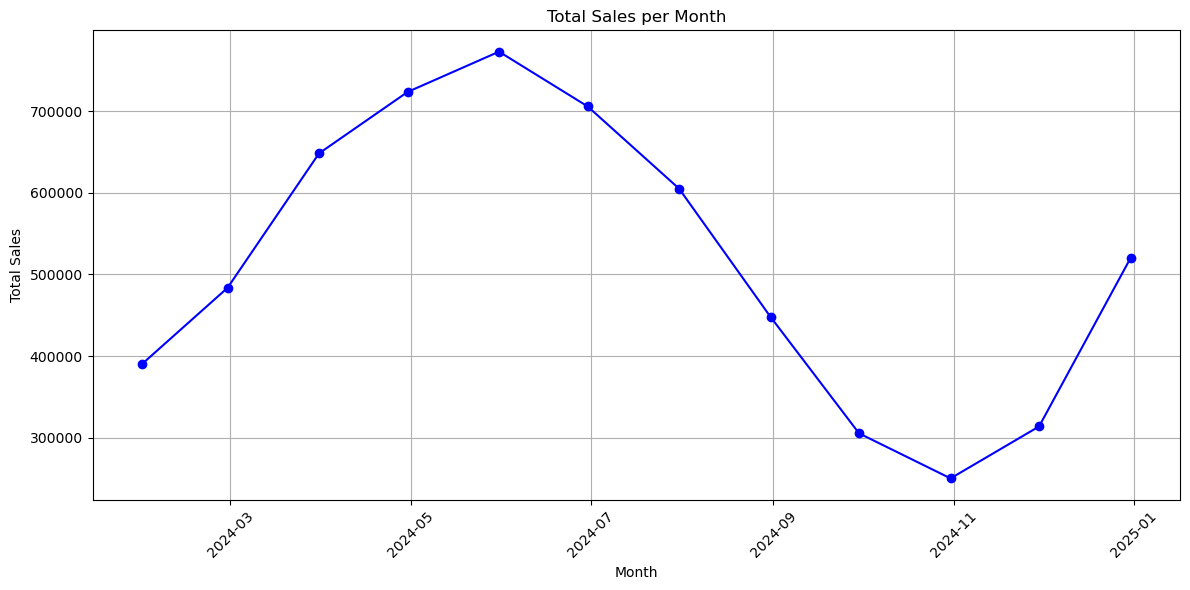

In [188]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'Date' column to datetime
df3['Date'] = pd.to_datetime(df3['Date'])

# Set 'Date' as the index
df3.set_index('Date', inplace=True)

# Resample data to monthly frequency and sum the sales
monthly_sales = df3['Sales'].resample('M').sum()

# Plot the monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [189]:
df3["Sold Quantity"].sum()

308644

In [190]:
df3["Sales"].sum()

6167560

In [191]:
df3["Holding Cost"].sum()

1309917.5

In [192]:
df3["Stock Out"].sum()

418

In [193]:
df3["Ordering Cost"].sum()

42150

In [194]:
df3["Order Quantity"].sum()

307695